# Legendre Polynomials

## Introduction

Legendre polynomials $P_n(x)$ are a family of orthogonal polynomials that arise as solutions to Legendre's differential equation:

$$\frac{d}{dx}\left[(1-x^2)\frac{dP_n}{dx}\right] + n(n+1)P_n = 0$$

These polynomials are fundamental in mathematical physics, appearing in the solution of Laplace's equation in spherical coordinates, multipole expansions in electrodynamics, and quantum mechanical angular momentum problems.

## Rodrigues' Formula

Legendre polynomials can be generated using Rodrigues' formula:

$$P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n}(x^2 - 1)^n$$

## Recurrence Relation

The polynomials satisfy the three-term recurrence relation:

$$(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)$$

with initial conditions $P_0(x) = 1$ and $P_1(x) = x$.

## Orthogonality

Legendre polynomials are orthogonal on the interval $[-1, 1]$ with respect to the weight function $w(x) = 1$:

$$\int_{-1}^{1} P_m(x) P_n(x) \, dx = \frac{2}{2n+1} \delta_{mn}$$

where $\delta_{mn}$ is the Kronecker delta.

## Key Properties

1. **Parity**: $P_n(-x) = (-1)^n P_n(x)$
2. **Boundary values**: $P_n(1) = 1$ and $P_n(-1) = (-1)^n$
3. **Generating function**: $\frac{1}{\sqrt{1 - 2xt + t^2}} = \sum_{n=0}^{\infty} P_n(x) t^n$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre, eval_legendre
from scipy.integrate import quad

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Implementing Legendre Polynomials

We implement Legendre polynomials using the recurrence relation for numerical stability:

In [2]:
def legendre_recurrence(n, x):
    """
    Compute Legendre polynomial P_n(x) using recurrence relation.
    
    Parameters:
    -----------
    n : int
        Degree of the polynomial
    x : array_like
        Points at which to evaluate the polynomial
        
    Returns:
    --------
    array_like
        Values of P_n(x)
    """
    x = np.asarray(x)
    
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x.copy()
    
    P_prev = np.ones_like(x)  # P_0
    P_curr = x.copy()         # P_1
    
    for k in range(1, n):
        P_next = ((2*k + 1) * x * P_curr - k * P_prev) / (k + 1)
        P_prev = P_curr
        P_curr = P_next
    
    return P_curr

# Test the implementation
x_test = np.array([0.0, 0.5, 1.0])
for n in range(5):
    our_result = legendre_recurrence(n, x_test)
    scipy_result = eval_legendre(n, x_test)
    print(f"P_{n}(x): Our={our_result}, SciPy={scipy_result}")

P_0(x): Our=[1. 1. 1.], SciPy=[1. 1. 1.]
P_1(x): Our=[0.  0.5 1. ], SciPy=[0.  0.5 1. ]
P_2(x): Our=[-0.5   -0.125  1.   ], SciPy=[-0.5   -0.125  1.   ]
P_3(x): Our=[-0.     -0.4375  1.    ], SciPy=[ 0.     -0.4375  1.    ]
P_4(x): Our=[ 0.375     -0.2890625  1.       ], SciPy=[ 0.375     -0.2890625  1.       ]


## Visualization of Legendre Polynomials

Let us plot the first several Legendre polynomials to observe their behavior:

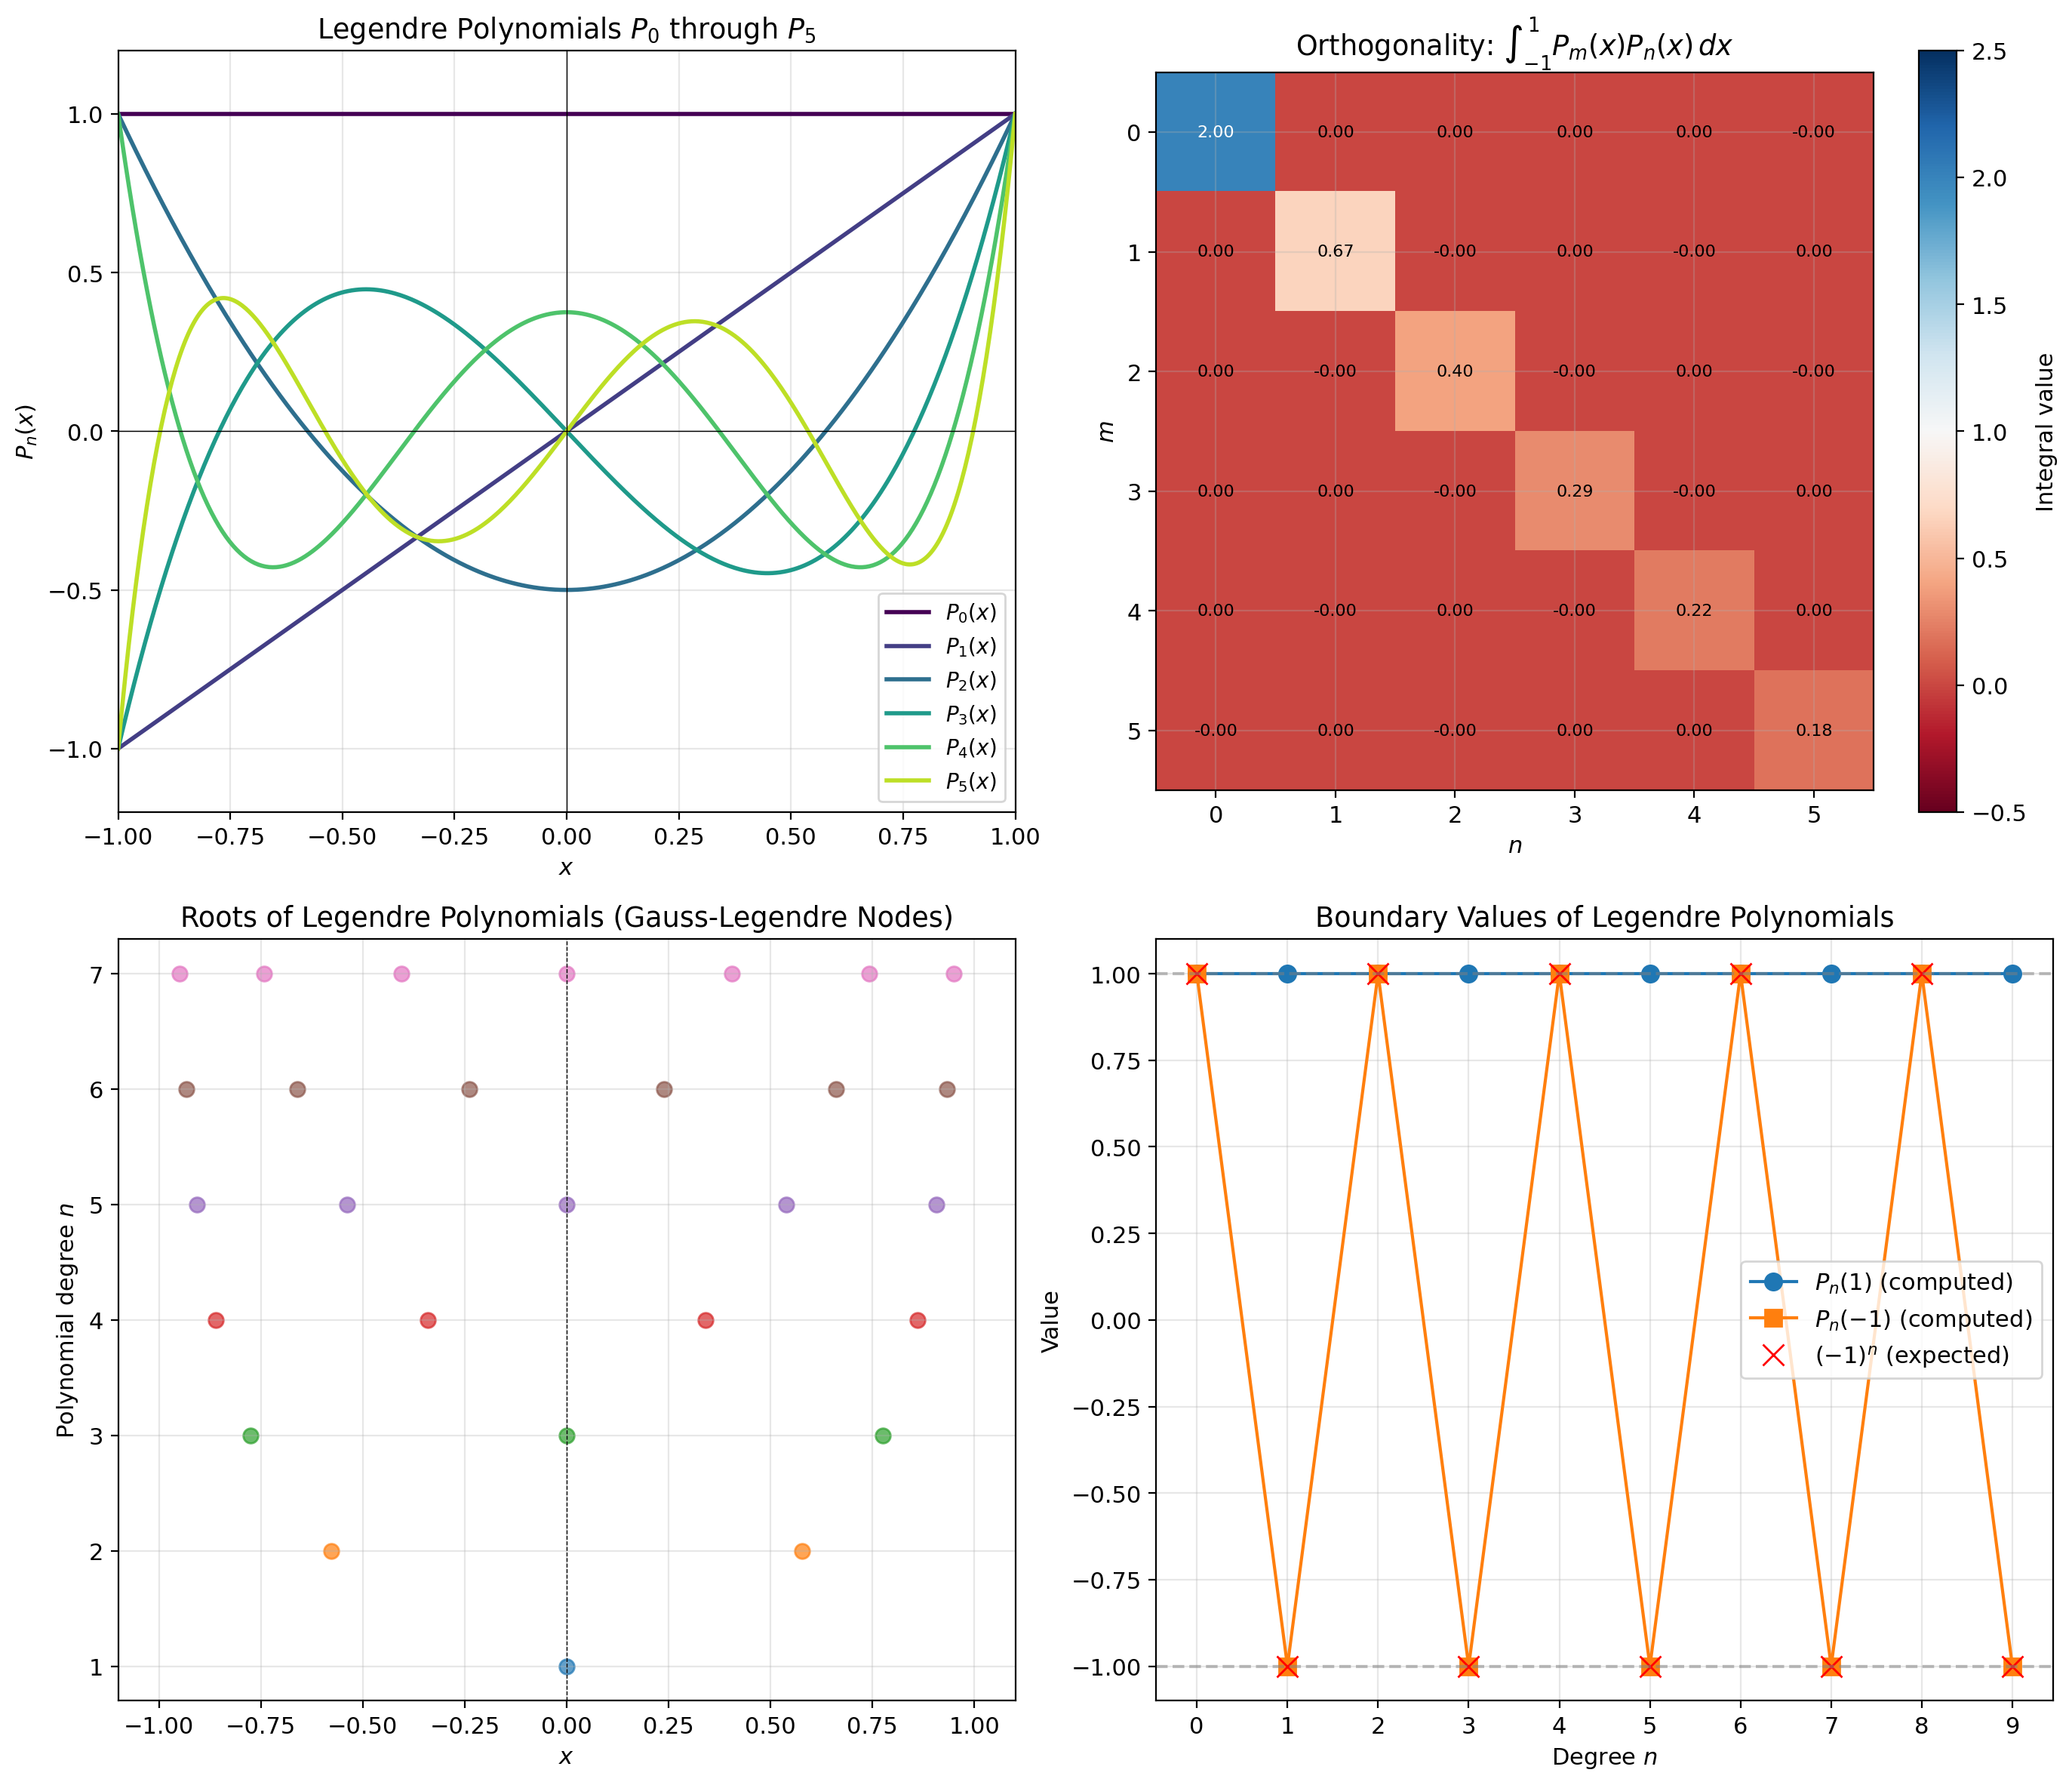


Plot saved to 'plot.png'


In [3]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# High-resolution x values
x = np.linspace(-1, 1, 500)

# Plot 1: First six Legendre polynomials
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0, 0.9, 6))
for n in range(6):
    y = eval_legendre(n, x)
    ax1.plot(x, y, label=f'$P_{n}(x)$', color=colors[n], linewidth=2)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$P_n(x)$')
ax1.set_title('Legendre Polynomials $P_0$ through $P_5$')
ax1.legend(loc='best', fontsize=10)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1.2, 1.2)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot 2: Verification of orthogonality
ax2 = axes[0, 1]
max_n = 6
orthogonality_matrix = np.zeros((max_n, max_n))

for m in range(max_n):
    for n in range(max_n):
        # Compute integral of P_m * P_n
        integrand = lambda x: eval_legendre(m, x) * eval_legendre(n, x)
        result, _ = quad(integrand, -1, 1)
        orthogonality_matrix[m, n] = result

im = ax2.imshow(orthogonality_matrix, cmap='RdBu', vmin=-0.5, vmax=2.5)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$m$')
ax2.set_title(r'Orthogonality: $\int_{-1}^{1} P_m(x) P_n(x) \, dx$')
ax2.set_xticks(range(max_n))
ax2.set_yticks(range(max_n))
plt.colorbar(im, ax=ax2, label='Integral value')

# Annotate with values
for i in range(max_n):
    for j in range(max_n):
        text = ax2.text(j, i, f'{orthogonality_matrix[i, j]:.2f}',
                       ha='center', va='center', fontsize=8,
                       color='white' if abs(orthogonality_matrix[i, j]) > 1 else 'black')

# Plot 3: Roots of Legendre polynomials (Gauss-Legendre quadrature nodes)
ax3 = axes[1, 0]
for n in range(1, 8):
    # Find roots using numpy's polynomial roots
    poly = legendre(n)
    roots = poly.roots
    ax3.scatter(roots, [n]*len(roots), s=50, alpha=0.7, 
                label=f'$n={n}$ ({len(roots)} roots)')

ax3.set_xlabel('$x$')
ax3.set_ylabel('Polynomial degree $n$')
ax3.set_title('Roots of Legendre Polynomials (Gauss-Legendre Nodes)')
ax3.set_xlim(-1.1, 1.1)
ax3.axvline(x=0, color='k', linewidth=0.5, linestyle='--')

# Plot 4: Verification of boundary conditions and recurrence
ax4 = axes[1, 1]
n_values = np.arange(0, 10)

# P_n(1) should equal 1
values_at_1 = [eval_legendre(n, 1.0) for n in n_values]
# P_n(-1) should equal (-1)^n
values_at_minus1 = [eval_legendre(n, -1.0) for n in n_values]
expected_at_minus1 = [(-1)**n for n in n_values]

ax4.plot(n_values, values_at_1, 'o-', label='$P_n(1)$ (computed)', markersize=8)
ax4.plot(n_values, values_at_minus1, 's-', label='$P_n(-1)$ (computed)', markersize=8)
ax4.plot(n_values, expected_at_minus1, 'x', label='$(-1)^n$ (expected)', 
         markersize=10, color='red')
ax4.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
ax4.axhline(y=-1, color='gray', linestyle='--', alpha=0.5)

ax4.set_xlabel('Degree $n$')
ax4.set_ylabel('Value')
ax4.set_title('Boundary Values of Legendre Polynomials')
ax4.legend(loc='best')
ax4.set_xticks(n_values)

plt.tight_layout()
plt.savefig('legendre_polynomials_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Application: Legendre Series Expansion

Any square-integrable function $f(x)$ on $[-1, 1]$ can be expanded in a Legendre series:

$$f(x) = \sum_{n=0}^{\infty} c_n P_n(x)$$

where the coefficients are:

$$c_n = \frac{2n+1}{2} \int_{-1}^{1} f(x) P_n(x) \, dx$$

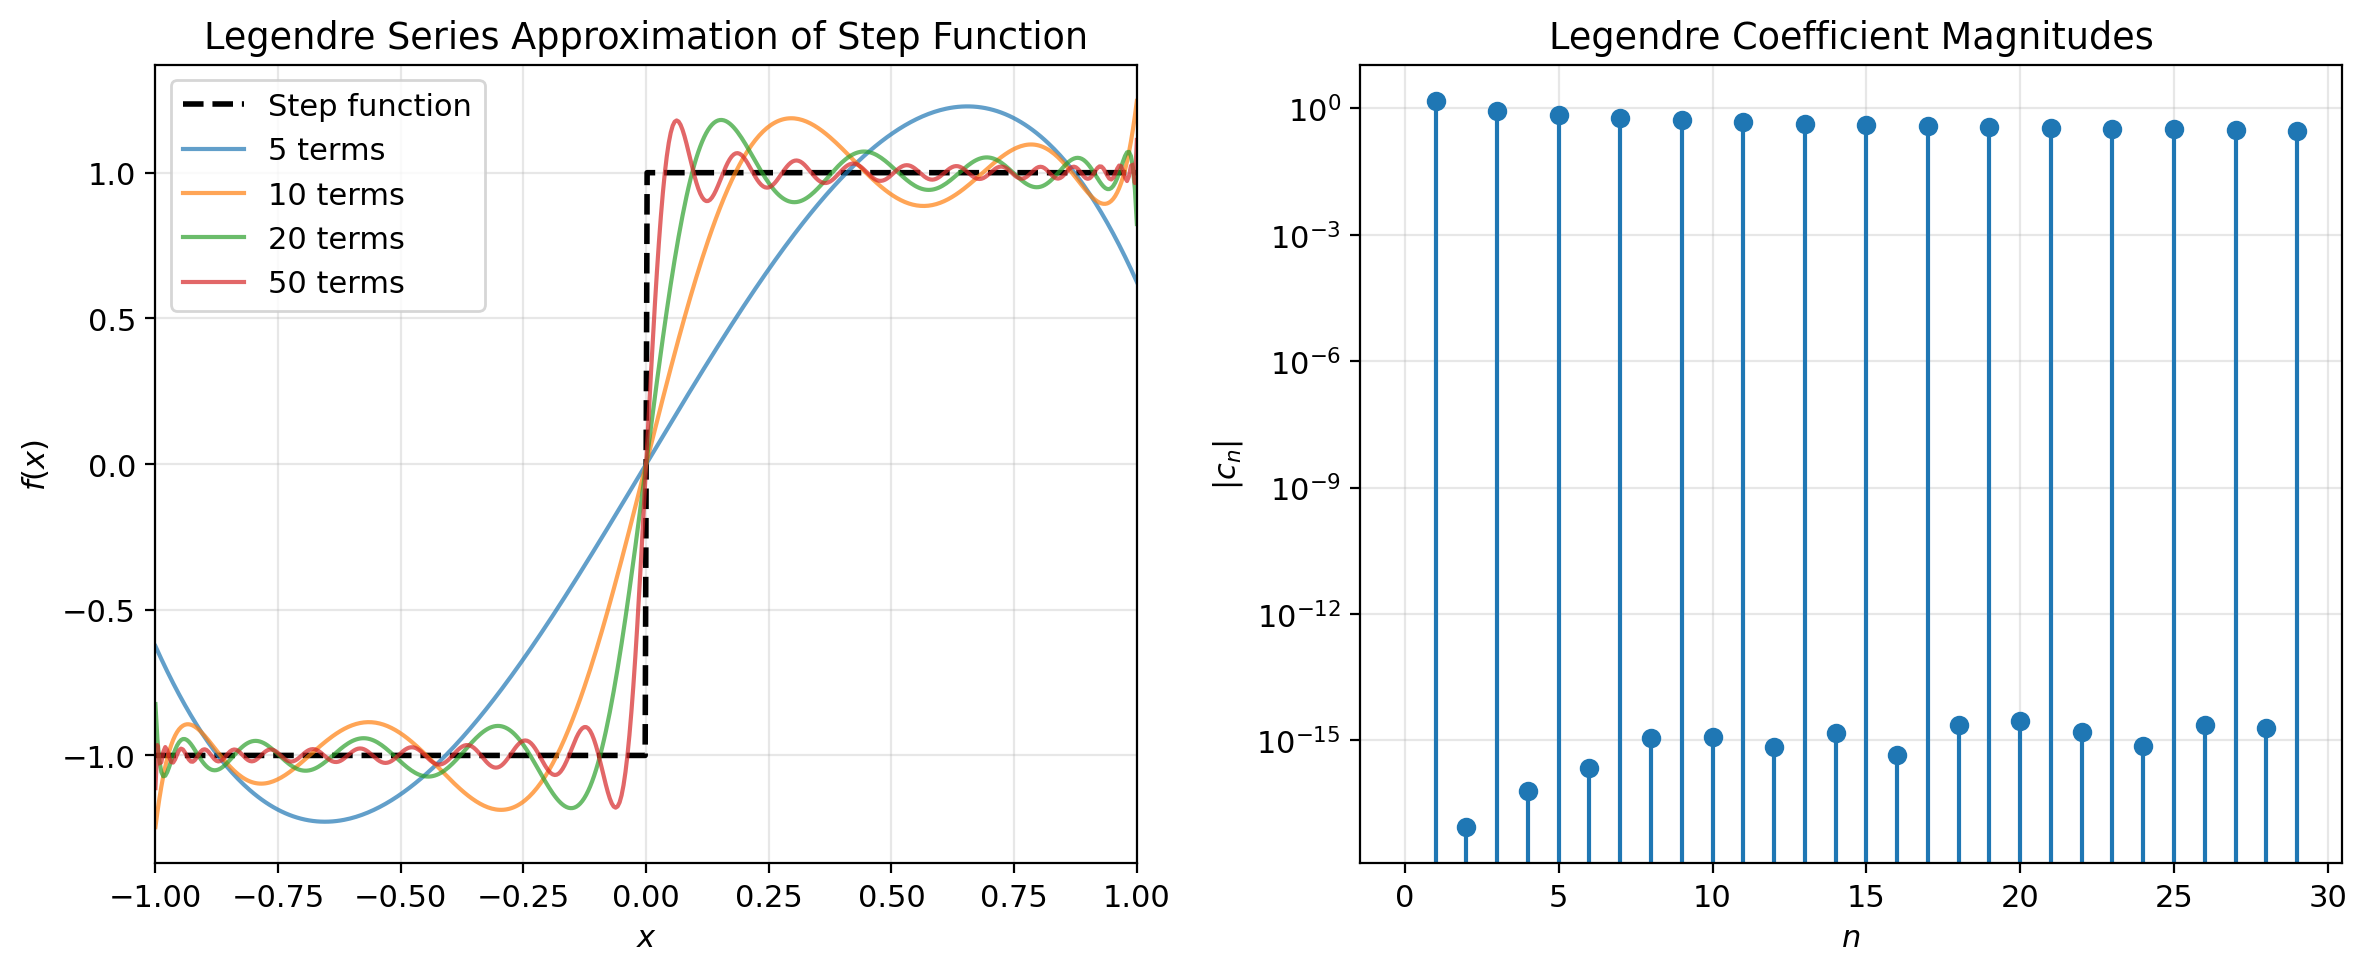

In [4]:
def legendre_coefficients(f, n_terms):
    """
    Compute Legendre series coefficients for a function f.
    
    Parameters:
    -----------
    f : callable
        Function to expand
    n_terms : int
        Number of terms in the expansion
        
    Returns:
    --------
    array
        Legendre coefficients c_0, c_1, ..., c_{n_terms-1}
    """
    coefficients = []
    
    for n in range(n_terms):
        integrand = lambda x: f(x) * eval_legendre(n, x)
        integral, _ = quad(integrand, -1, 1)
        c_n = (2*n + 1) / 2 * integral
        coefficients.append(c_n)
    
    return np.array(coefficients)

def legendre_series(x, coefficients):
    """
    Evaluate Legendre series at points x.
    """
    result = np.zeros_like(x)
    for n, c_n in enumerate(coefficients):
        result += c_n * eval_legendre(n, x)
    return result

# Example: Expand the step function
def step_function(x):
    return np.where(x >= 0, 1.0, -1.0)

# Compute coefficients
x = np.linspace(-1, 1, 500)
n_terms_list = [5, 10, 20, 50]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, step_function(x), 'k--', linewidth=2, label='Step function')

for n_terms in n_terms_list:
    coeffs = legendre_coefficients(step_function, n_terms)
    approximation = legendre_series(x, coeffs)
    plt.plot(x, approximation, label=f'{n_terms} terms', alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Legendre Series Approximation of Step Function')
plt.legend()
plt.xlim(-1, 1)
plt.grid(True, alpha=0.3)

# Show coefficient decay
plt.subplot(1, 2, 2)
coeffs = legendre_coefficients(step_function, 30)
plt.stem(range(len(coeffs)), np.abs(coeffs), basefmt=' ')
plt.xlabel('$n$')
plt.ylabel('$|c_n|$')
plt.title('Legendre Coefficient Magnitudes')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Gauss-Legendre Quadrature

The roots of Legendre polynomials serve as optimal nodes for numerical integration. The $n$-point Gauss-Legendre quadrature rule:

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{n} w_i f(x_i)$$

is exact for polynomials of degree up to $2n-1$.

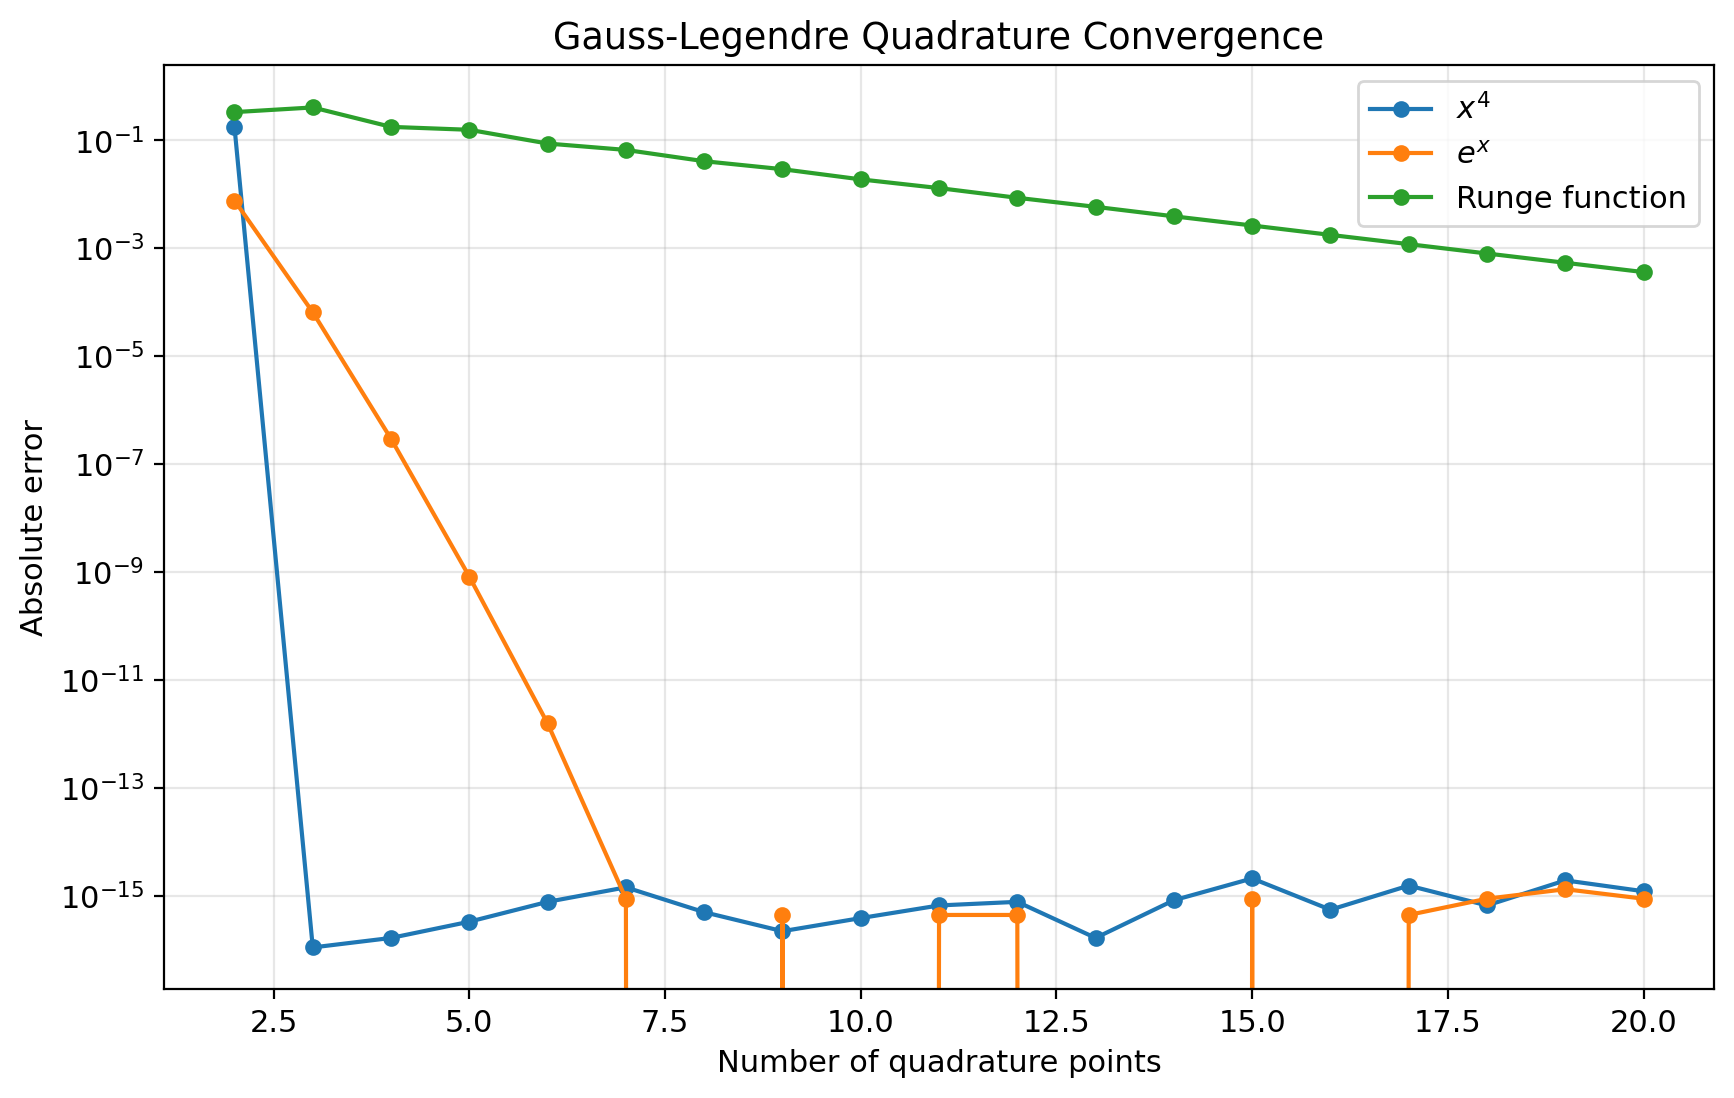


Gauss-Legendre exactness for polynomials:
n=2 points, degree 3: error = 0.00e+00
n=3 points, degree 5: error = 0.00e+00
n=4 points, degree 7: error = 0.00e+00
n=5 points, degree 9: error = 0.00e+00


In [5]:
from numpy.polynomial.legendre import leggauss

# Compare Gauss-Legendre quadrature accuracy
def test_quadrature(f, exact, n_points_list):
    """
    Test Gauss-Legendre quadrature for different numbers of points.
    """
    errors = []
    
    for n in n_points_list:
        nodes, weights = leggauss(n)
        approx = np.sum(weights * f(nodes))
        error = np.abs(approx - exact)
        errors.append(error)
        
    return errors

# Test functions
test_cases = [
    (lambda x: x**4, 2/5, '$x^4$'),
    (lambda x: np.exp(x), np.exp(1) - np.exp(-1), '$e^x$'),
    (lambda x: 1/(1 + 25*x**2), 2*np.arctan(5)/5, 'Runge function'),
]

n_points_list = np.arange(2, 21)

plt.figure(figsize=(10, 6))

for f, exact, label in test_cases:
    errors = test_quadrature(f, exact, n_points_list)
    plt.semilogy(n_points_list, errors, 'o-', label=label, markersize=5)

plt.xlabel('Number of quadrature points')
plt.ylabel('Absolute error')
plt.title('Gauss-Legendre Quadrature Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Demonstrate exactness for polynomials
print("\nGauss-Legendre exactness for polynomials:")
print("="*50)
for n in [2, 3, 4, 5]:
    nodes, weights = leggauss(n)
    # Should be exact up to degree 2n-1
    max_exact_degree = 2*n - 1
    
    # Test polynomial of degree 2n-1
    f = lambda x: x**max_exact_degree
    if max_exact_degree % 2 == 0:
        exact = 2 / (max_exact_degree + 1)
    else:
        exact = 0
    
    approx = np.sum(weights * f(nodes))
    error = np.abs(approx - exact)
    print(f"n={n} points, degree {max_exact_degree}: error = {error:.2e}")

## Summary

This notebook has explored Legendre polynomials, demonstrating:

1. **Theoretical foundations**: Rodrigues' formula, recurrence relations, and orthogonality
2. **Computational methods**: Efficient evaluation using recurrence relations
3. **Key properties**: Boundary values, symmetry, and root distributions
4. **Applications**: Legendre series expansions and Gauss-Legendre quadrature

Legendre polynomials form the foundation for many advanced techniques in computational physics, including spherical harmonics, multipole expansions, and spectral methods for solving differential equations.